In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM


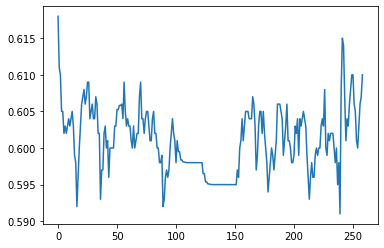

In [19]:
df=pd.read_csv('1_cell_1.csv')
df=df['ResistValue']
df.plot()


In [5]:
def error_rate(original, prediction, ft_len, forecast_len):
    error_avg = []
    ft_len = ft_len-1
    for i in range(forecast_len):
      error = abs((original[ft_len+i] - prediction[-forecast_len+i]))/original[ft_len+i] * 100
      print('num',i,error,'actual',original[ft_len+i],'prediction',prediction[-forecast_len+i])
      print("오차율 :",error)
      error_avg.append(error)
    print('최소 오류값 :',min(error_avg))
    print('최대 오류값 :',max(error_avg))
    return sum(error_avg)/len(error_avg)

def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P
# Initialization for system model.
A = 1
H = 1
Q = 0.0001
R = 0.001
# Initialization for estimation.
x_0 = 10  # 14 for book.
P_0 = 6

def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - (window_size+20)):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size+20]))
    return np.array(feature_list), np.array(label_list)

In [20]:
n_samples = len(df)
x_0 = df[1]
r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = df[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

df = r_esti_save

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['ResistValue']
df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

train=df_scaled
feature_cols = ['ResistValue']
label_cols = ['ResistValue']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 60)
total_len = len(train_feature)

x_train = train_feature[:int(total_len*0.8)]
x_valid = train_feature[int(total_len*0.8):]
y_train = train_label[:int(total_len*0.8)]
y_valid = train_label[int(total_len*0.8):]

print(x_train.shape)

model= Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

from keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
early_stop=EarlyStopping(monitor='mse', patience=20)

model.fit(x_train, y_train, epochs=100, batch_size=1, callbacks=[early_stop])
model.save('testmodel.h5')

(143, 60, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 76,929
Trainable params: 76,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
143/143 [==============================] - 4s 16ms/step - loss: 0.0540 - mse: 0.0540
Epoch 2/100
143/143 [==============================] - 2s 16ms/step - loss: 0.0313 - mse: 0.0313
Epoch 3/100
143/143 [====================

train_feature shape  (488, 20, 1)
prediction shape  (488, 1)


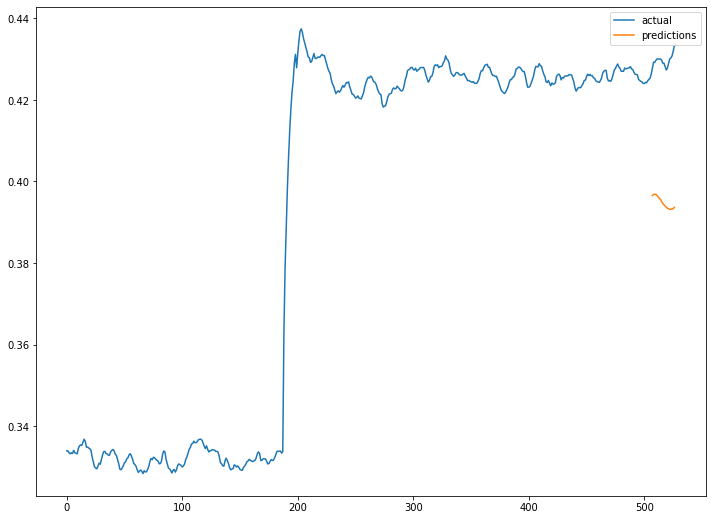

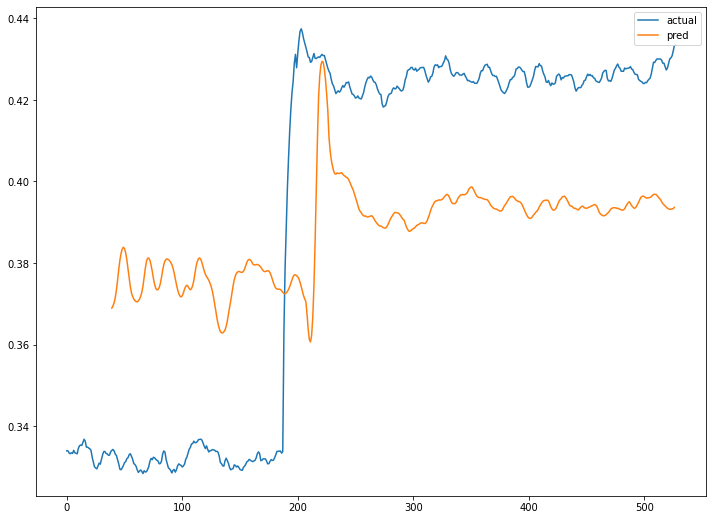

num 0 [7.18863568] actual [0.42725566] prediction [0.3965418]
오차율 : [7.18863568]
num 1 [7.10648895] actual [0.42718659] prediction [0.39682862]
오차율 : [7.10648895]
num 2 [6.67516923] actual [0.42524509] prediction [0.39685926]
오차율 : [6.67516923]
num 3 [6.5439479] actual [0.42463856] prediction [0.39685044]
오차율 : [6.5439479]
num 4 [6.62894075] actual [0.42473621] prediction [0.3965807]
오차율 : [6.62894075]
num 5 [6.67251161] actual [0.42453732] prediction [0.39621]
오차율 : [6.67251161]
num 6 [6.89690025] actual [0.42520263] prediction [0.39587682]
오차율 : [6.89690025]
num 7 [7.18507156] actual [0.42622851] prediction [0.3956037]
오차율 : [7.18507156]
num 8 [7.54046157] actual [0.4272474] prediction [0.39503098]
오차율 : [7.54046157]
num 9 [7.74042929] actual [0.42772088] prediction [0.39461344]
오차율 : [7.74042929]
num 10 [7.95036311] actual [0.4283366] prediction [0.39428228]
오차율 : [7.95036311]
num 11 [8.10825418] actual [0.42878598] prediction [0.39401892]
오차율 : [8.10825418]
num 12 [8.02024686] actu

In [15]:
df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==20].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
forecasting=20
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

print("train_feature shape ", train_feature2.shape)
print("prediction shape ", predictions.shape)


# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[forecasting+19:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

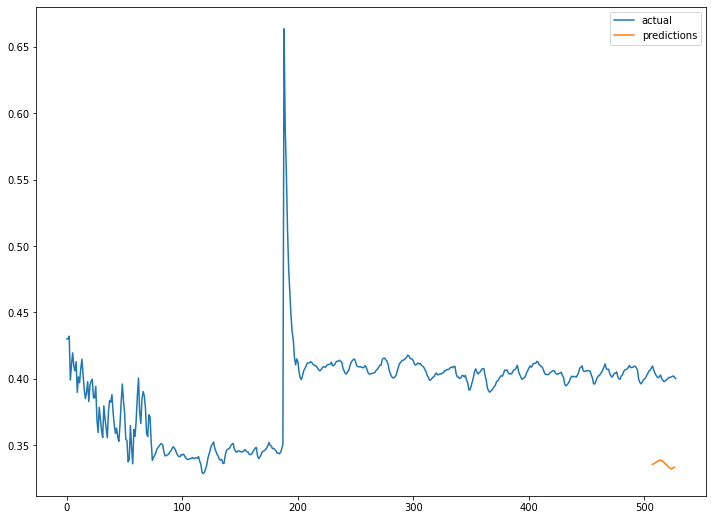

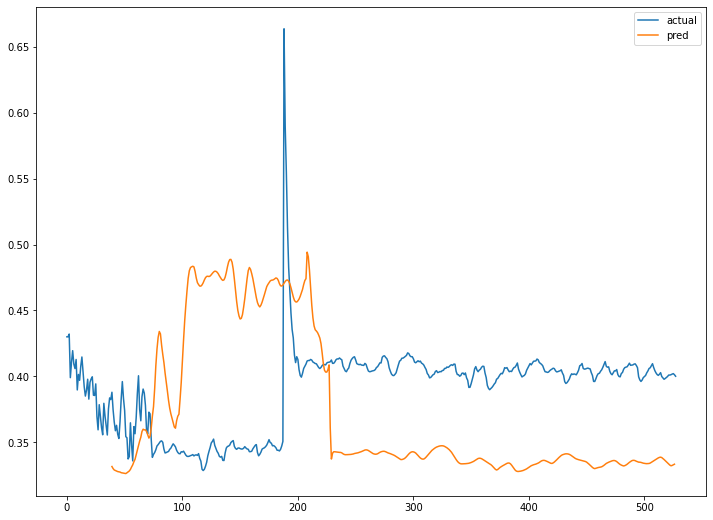

num 0 [18.43152025] actual [0.41121161] prediction [0.33541906]
오차율 : [18.43152025]
num 1 [17.57959302] actual [0.40764241] prediction [0.33598053]
오차율 : [17.57959302]
num 2 [17.30826807] actual [0.40692855] prediction [0.33649626]
오차율 : [17.30826807]
num 3 [17.22544117] actual [0.40721801] prediction [0.3370729]
오차율 : [17.22544117]
num 4 [16.41104862] actual [0.40391724] prediction [0.33763018]
오차율 : [16.41104862]
num 5 [15.88787426] actual [0.4020485] prediction [0.33817154]
오차율 : [15.88787426]
num 6 [15.61681809] actual [0.40122493] prediction [0.33856636]
오차율 : [15.61681809]
num 7 [15.9045983] actual [0.4027851] prediction [0.33872375]
오차율 : [15.9045983]
num 8 [16.27071962] actual [0.40419394] prediction [0.33842868]
오차율 : [16.27071962]
num 9 [16.43279783] actual [0.40414154] prediction [0.33772978]
오차율 : [16.43279783]
num 10 [16.84061755] actual [0.40518393] prediction [0.33694845]
오차율 : [16.84061755]
num 11 [16.26062518] actual [0.40135205] prediction [0.3360897]
오차율 : [16.260625

In [16]:
df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==60].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
forecasting=20
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[forecasting+19:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

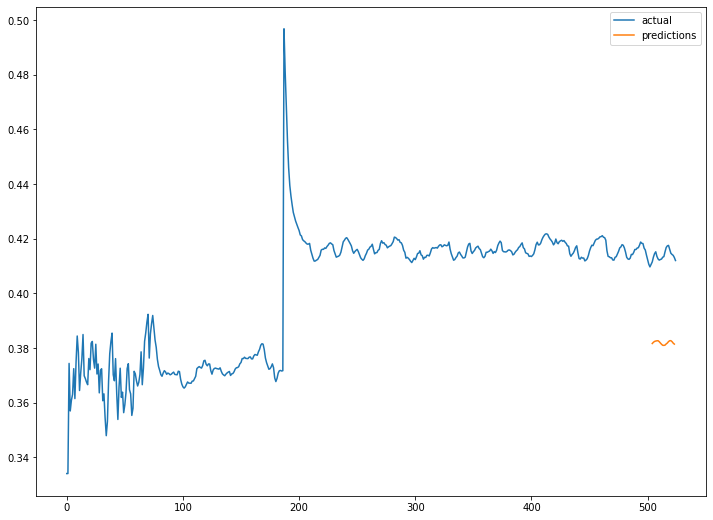

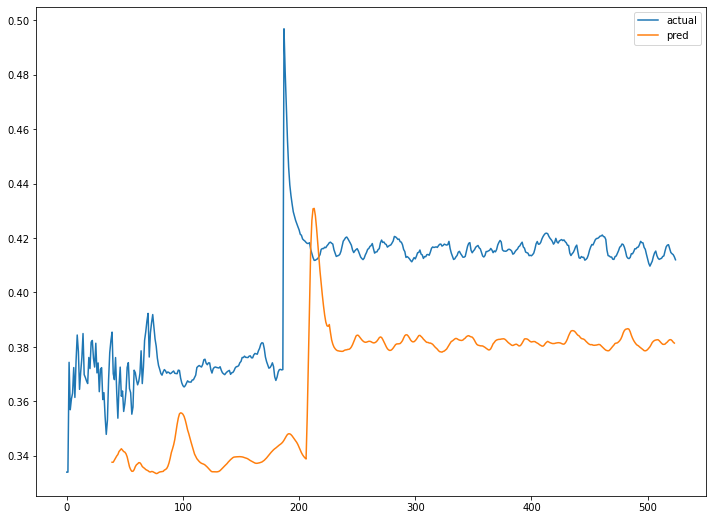

num 0 [9.2225025] actual [0.42038428] prediction [0.38161433]
오차율 : [9.2225025]
num 1 [8.91675664] actual [0.41946999] prediction [0.38206688]
오차율 : [8.91675664]
num 2 [7.98413767] actual [0.41556084] prediction [0.3823819]
오차율 : [7.98413767]
num 3 [7.49629265] actual [0.41351823] prediction [0.3825197]
오차율 : [7.49629265]
num 4 [7.44391193] actual [0.41337823] prediction [0.38260671]
오차율 : [7.44391193]
num 5 [7.35381692] actual [0.41300589] prediction [0.3826342]
오차율 : [7.35381692]
num 6 [7.43624176] actual [0.4130043] prediction [0.3822923]
오차율 : [7.43624176]
num 7 [7.37337082] actual [0.41219267] prediction [0.38180017]
오차율 : [7.37337082]
num 8 [7.47568552] actual [0.41214062] prediction [0.38133028]
오차율 : [7.47568552]
num 9 [7.79750657] actual [0.41318325] prediction [0.38096526]
오차율 : [7.79750657]
num 10 [7.85682549] actual [0.4134039] prediction [0.38092348]
오차율 : [7.85682549]
num 11 [8.04830957] actual [0.41437541] prediction [0.3810252]
오차율 : [8.04830957]
num 12 [8.16003578] act

In [17]:
df=pd.read_csv('m2_s2_bank_fc3d2b581285134ea7b13a850adfc373__site_1239fca6caf920448b3cd13f6a2997af.csv')
df=df[df['CellNo']==78].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
forecasting=20
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[forecasting+19:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)

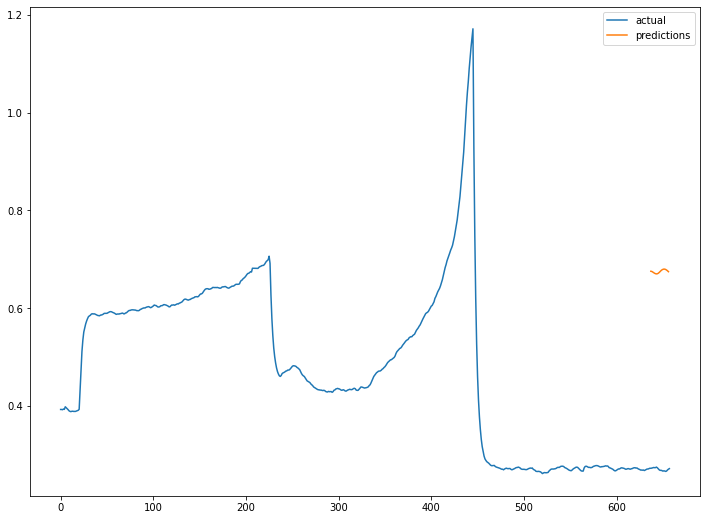

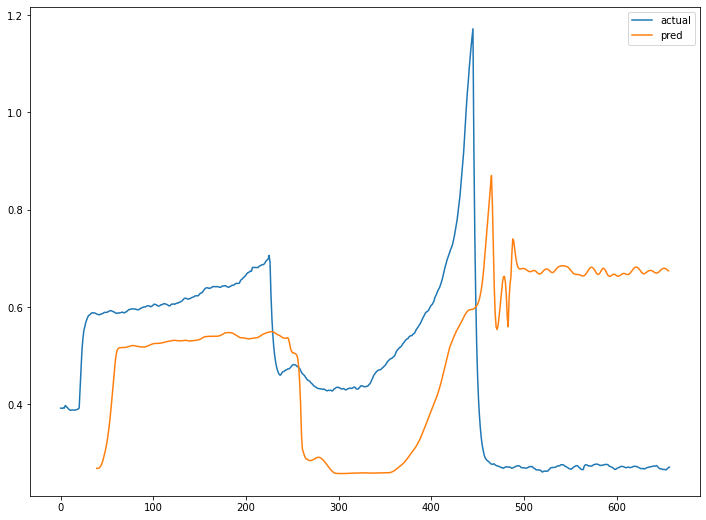

num 0 [150.39736197] actual [0.26958372] prediction [0.6750305]
오차율 : [150.39736197]
num 1 [151.89334497] actual [0.26780509] prediction [0.6745832]
오차율 : [151.89334497]
num 2 [152.71720151] actual [0.26650696] prediction [0.67350894]
오차율 : [152.71720151]
num 3 [152.35541465] actual [0.26637] prediction [0.67219913]
오차율 : [152.35541465]
num 4 [150.71637958] actual [0.26762083] prediction [0.67096925]
오차율 : [150.71637958]
num 5 [149.27909557] actual [0.26880389] prediction [0.6700719]
오차율 : [149.27909557]
num 6 [147.82148638] actual [0.27020765] prediction [0.6696326]
오차율 : [147.82148638]
num 7 [147.97735136] actual [0.27015155] prediction [0.66991466]
오차율 : [147.97735136]
num 8 [147.37722789] actual [0.27119123] prediction [0.67086536]
오차율 : [147.37722789]
num 9 [146.77662563] actual [0.27249035] prediction [0.6724425]
오차율 : [146.77662563]
num 10 [147.60668134] actual [0.27235788] prediction [0.6743763]
오차율 : [147.60668134]
num 11 [148.64359699] actual [0.27199104] prediction [0.676288

In [18]:
df=pd.read_csv('m2_s2_bank_0765f177a52e5543a9e0a8bfc045cf6a__site_40ab7c891c559b478e96f8bb5c682ca0.csv')
df=df[df['CellNo']==20].reset_index(drop=True)
x_test2=df['ResistValue']
n_samples=len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
forecasting=20
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)
predictions = model.predict(train_feature2)

# Inversing
predictions = scaler.inverse_transform(predictions)
x_test2 = scaler.inverse_transform(x_test2)


feature_len = len(x_test2)-1 
plot_len = feature_len-20

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[plot_len:], predictions[-20:], label='predictions')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(x_test2[:], label ='actual')
plt.plot(x_data[forecasting+19:],predictions, label='pred')
plt.legend()
plt.show()


feature_len = len(train_feature2) - 1
plot_len = feature_len-20
error= error_rate(x_test2, predictions, plot_len, 20)
print('평균 오차율 :',error)